In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
header = [
    "id",
    "age",
    "gender",
    "education",
    "country",
    "ethnicity",
    "neuroticism",
    "extraversion",
    "openness",
    "agreeableness",
    "conscientiousness",
    "impulsiveness",
    "sensation_seeking",
    "alcohol",
    "amphet",
    "amyl",
    "benzos",
    "caff",
    "cannabis",
    "choc",
    "coke",
    "crack",
    "ecstasy",
    "heroin",
    "ketamine",
    "legallh",
    "lsd",
    "meth",
    "mushroom",
    "nicotine",
    "semer",
    "vsa",
]

df = pd.read_csv(
    "https://archive.ics.uci.edu/ml/machine-learning-databases/00373/drug_consumption.data",
    names=header,
)
df

,id,age,gender,education,country,ethnicity,neuroticism,extraversion,openness,agreeableness,...,ecstasy,heroin,ketamine,legallh,lsd,meth,mushroom,nicotine,semer,vsa
0,1,0.49788,0.48246,-0.05921,0.96082,0.12600,0.31287,-0.57545,-0.58331,-0.91699,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL2,CL0,CL0
1,2,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,...,CL4,CL0,CL2,CL0,CL2,CL3,CL0,CL4,CL0,CL0
2,3,0.49788,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,...,CL0,CL0,CL0,CL0,CL0,CL0,CL1,CL0,CL0,CL0
3,4,-0.95197,0.48246,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,...,CL0,CL0,CL2,CL0,CL0,CL0,CL0,CL2,CL0,CL0
4,5,0.49788,0.48246,1.98437,0.96082,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,...,CL1,CL0,CL0,CL1,CL0,CL0,CL2,CL2,CL0,CL0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1880,1884,-0.95197,0.48246,-0.61113,-0.57009,-0.31685,-1.19430,1.74091,1.88511,0.76096,...,CL0,CL0,CL0,CL3,CL3,CL0,CL0,CL0,CL0,CL5
1881,1885,-0.95197,-0.48246,-0.61113,-0.57009,-0.31685,-0.24649,1.74091,0.58331,0.76096,...,CL2,CL0,CL0,CL3,CL5,CL4,CL4,CL5,CL0,CL0
1882,1886,-0.07854,0.48246,0.45468,-0.57009,-0.31685,1.13281,-1.37639,-1.27553,-1.77200,...,CL4,CL0,CL2,CL0,CL2,CL0,CL2,CL6,CL0,CL0
1883,1887,-0.95197,0.48246,-0.61113,-0.57009,-0.31685,0.91093,-1.92173,0.29338,-1.62090,...,CL3,CL0,CL0,CL3,CL3,CL0,CL3,CL4,CL0,CL0


## Preprocessing

Semer est une drogue fictive ajouté dans le questionnaire par les chercheurs.  
Les personnes ayant répondu qu'ils en avaient consommé ont donc menti on a donc décidé de supprimé ces personnes du dataset.


In [3]:
semer_consummer_index = df.loc[df["semer"] != "CL0"].index

print(
    "Nombre de personnes ayant indiqué avoir consommé la drogue fictive : ",
    semer_consummer_index.size,
)

df.drop(index=semer_consummer_index, inplace=True)

Nombre de personnes ayant indiqué avoir consommé la drogue fictive :  8


In [4]:
df.describe()

,id,age,gender,education,country,ethnicity,neuroticism,extraversion,openness,agreeableness,conscientiousness,impulsiveness,sensation_seeking
count,1877.000000,1877.000000,1877.000000,1877.000000,1877.000000,1877.000000,1877.000000,1877.000000,1877.000000,1877.000000,1877.000000,1877.000000,1877.000000
mean,943.079915,0.037577,-0.000771,-0.000984,0.358984,-0.309728,-0.000551,-0.001951,-0.003224,-0.000657,-0.000394,0.005293,-0.007408
std,544.601919,0.878387,0.482588,0.949831,0.699707,0.166220,0.998442,0.997418,0.995691,0.996689,0.997657,0.954148,0.962074
min,1.000000,-0.951970,-0.482460,-2.435910,-0.570090,-1.107020,-3.464360,-3.273930,-3.273930,-3.464360,-3.464360,-2.555240,-2.078480
25%,472.000000,-0.951970,-0.482460,-0.611130,-0.570090,-0.316850,-0.678250,-0.695090,-0.717270,-0.606330,-0.652530,-0.711260,-0.525930
50%,944.000000,-0.078540,-0.482460,-0.059210,0.960820,-0.316850,0.042570,0.003320,-0.019280,-0.017290,-0.006650,-0.217120,0.079870
75%,1413.000000,0.497880,0.482460,0.454680,0.960820,-0.316850,0.629670,0.637790,0.723300,0.760960,0.584890,0.529750,0.765400
max,1888.000000,2.591710,0.482460,1.984370,0.960820,1.907250,3.273930,3.273930,2.901610,3.464360,3.464360,2.901610,1.921730


Le dataset a toutes ses informations modifié par un Standard Scaler. Or, certaines features sont catégorique et pour la visualisation, avoir les vrais valeurs est plus intéressants.


In [5]:
age = {
    -0.95197: "18-24",
    -0.07854: "25-34",
    0.49788: "35-44",
    1.09449: "45-54",
    1.82213: "55-64",
    2.59171: "65+",
}
gender = {-0.48246: "male", 0.48246: "female"}
education = {
    -2.43591: "left school before 16",
    -1.7379: "left school at 16",
    -1.43719: "left school at 17",
    -1.22751: "left school at 18",
    -0.61113: "left college without degree",
    -0.05921: "professionnal certificate",
    0.45468: "university degree",
    1.16365: "master degree",
    1.98437: "doctorate degree",
}
country = {
    -0.57009: "USA",
    -0.46841: "New Zealand",
    -0.28519: "Other",
    -0.09765: "Australia",
    0.21128: "Republic of Ireland",
    0.24923: "Canada",
    0.96082: "UK",
}
ethnicity = {
    -1.10702: "Black",
    -0.50212: "Asian",
    -0.31685: "White",
    -0.22166: "Mixed-White/Black",
    0.11440: "Other",
    0.12600: "Mixed-White/Asian",
    1.90725: "Mixed-Black/Asian",
}
neuroticism = {
    -3.464360: 12,
    -3.157350: 13,
    -2.756960: 14,
    -2.521970: 15,
    -2.423170: 16,
    -2.343600: 17,
    -2.218440: 18,
    -2.050480: 19,
    -1.869620: 20,
    -1.691630: 21,
    -1.550780: 22,
    -1.439070: 23,
    -1.328280: 24,
    -1.194300: 25,
    -1.053080: 26,
    -0.921040: 27,
    -0.791510: 28,
    -0.678250: 29,
    -0.580160: 30,
    -0.467250: 31,
    -0.347990: 32,
    -0.246490: 33,
    -0.148820: 34,
    -0.051880: 35,
    0.042570: 36,
    0.136060: 37,
    0.223930: 38,
    0.312870: 39,
    0.416670: 40,
    0.521350: 41,
    0.629670: 42,
    0.735450: 43,
    0.825620: 44,
    0.910930: 45,
    1.021190: 46,
    1.132810: 47,
    1.234610: 48,
    1.372970: 49,
    1.491580: 50,
    1.603830: 51,
    1.720120: 52,
    1.839900: 53,
    1.984370: 54,
    2.127000: 55,
    2.285540: 56,
    2.462620: 57,
    2.611390: 58,
    2.821960: 59,
    3.273930: 60,
}
extraversion = {
    -3.273930: 16,
    -3.005370: 18,
    -2.728270: 19,
    -2.538300: 20,
    -2.449040: 21,
    -2.323380: 22,
    -2.210690: 23,
    -2.114370: 24,
    -2.039720: 25,
    -1.921730: 26,
    -1.762500: 27,
    -1.633400: 28,
    -1.507960: 29,
    -1.376390: 30,
    -1.231770: 31,
    -1.092070: 32,
    -0.947790: 33,
    -0.806150: 34,
    -0.695090: 35,
    -0.575450: 36,
    -0.439990: 37,
    -0.300330: 38,
    -0.154870: 39,
    0.003320: 40,
    0.167670: 41,
    0.321970: 42,
    0.476170: 43,
    0.637790: 44,
    0.805230: 45,
    0.962480: 46,
    1.114060: 47,
    1.286100: 48,
    1.454210: 49,
    1.584870: 50,
    1.740910: 51,
    1.938860: 52,
    2.127000: 53,
    2.323380: 54,
    2.573090: 55,
    2.859500: 56,
    3.005370: 58,
    3.273930: 59,
}
openness = {
    -3.273930: 24,
    -2.859500: 26,
    -2.631990: 28,
    -2.398830: 29,
    -2.210690: 30,
    -2.090150: 31,
    -1.974950: 32,
    -1.829190: 33,
    -1.680620: 34,
    -1.555210: 35,
    -1.424240: 36,
    -1.275530: 37,
    -1.119020: 38,
    -0.976310: 39,
    -0.847320: 40,
    -0.717270: 41,
    -0.583310: 42,
    -0.451740: 43,
    -0.317760: 44,
    -0.177790: 45,
    -0.019280: 46,
    0.141430: 47,
    0.293380: 48,
    0.445850: 49,
    0.583310: 50,
    0.723300: 51,
    0.883090: 52,
    1.062380: 53,
    1.240330: 54,
    1.435330: 55,
    1.656530: 56,
    1.885110: 57,
    2.153240: 58,
    2.449040: 59,
    2.901610: 60,
}
agreeableness = {
    -3.464360: 12,
    -3.157350: 16,
    -3.005370: 18,
    -2.901610: 23,
    -2.787930: 24,
    -2.701720: 25,
    -2.538300: 26,
    -2.354130: 27,
    -2.218440: 28,
    -2.078480: 29,
    -1.925950: 30,
    -1.772000: 31,
    -1.620900: 32,
    -1.479550: 33,
    -1.342890: 34,
    -1.212130: 35,
    -1.075330: 36,
    -0.916990: 37,
    -0.760960: 38,
    -0.606330: 39,
    -0.453210: 40,
    -0.301720: 41,
    -0.154870: 42,
    -0.017290: 43,
    0.131360: 44,
    0.287830: 45,
    0.438520: 46,
    0.590420: 47,
    0.760960: 48,
    0.941560: 49,
    1.114060: 50,
    1.286100: 51,
    1.450390: 52,
    1.611080: 53,
    1.818660: 54,
    2.039720: 55,
    2.234270: 56,
    2.462620: 57,
    2.756960: 58,
    3.157350: 59,
    3.464360: 60,
}
conscientiousness = {
    -3.464360: 17,
    -3.157350: 19,
    -2.901610: 20,
    -2.728270: 21,
    -2.573090: 22,
    -2.423170: 23,
    -2.304080: 24,
    -2.181090: 25,
    -2.045060: 26,
    -1.921730: 27,
    -1.781690: 28,
    -1.641010: 29,
    -1.518400: 30,
    -1.385020: 31,
    -1.257730: 32,
    -1.137880: 33,
    -1.014500: 34,
    -0.898910: 35,
    -0.781550: 36,
    -0.652530: 37,
    -0.527450: 38,
    -0.405810: 39,
    -0.276070: 40,
    -0.142770: 41,
    -0.006650: 42,
    0.123310: 43,
    0.259530: 44,
    0.415940: 45,
    0.584890: 46,
    0.758300: 47,
    0.939490: 48,
    1.134070: 49,
    1.306120: 50,
    1.461910: 51,
    1.630880: 52,
    1.811750: 53,
    2.045060: 54,
    2.333370: 55,
    2.631990: 56,
    3.005370: 57,
    3.464360: 59,
}

features = {
    "age": age,
    "gender": gender,
    "education": education,
    "country": country,
    "ethnicity": ethnicity,
    "neuroticism": neuroticism,
    "extraversion": extraversion,
    "openness": openness,
    "agreeableness": agreeableness,
    "conscientiousness": conscientiousness,
}

On a choisi de garder uniquement le canabis comme objectif. \
Aussi, on n'utilisera pas ethnicity pour raison éthique.


In [6]:
df.replace(features, inplace=True)

df_cannabis = df.loc[
    :,
    [
        "age",
        "gender",
        "education",
        "country",
        "neuroticism",
        "extraversion",
        "openness",
        "agreeableness",
        "conscientiousness",
        "impulsiveness",
        "sensation_seeking",
        "cannabis",
    ],
]

df_cannabis

,age,gender,education,country,neuroticism,extraversion,openness,agreeableness,conscientiousness,impulsiveness,sensation_seeking,cannabis
0,35-44,female,professionnal certificate,UK,39.0,36.0,42.0,37.0,42.0,-0.21712,-1.18084,CL0
1,25-34,male,doctorate degree,UK,29.0,52.0,55.0,48.0,41.0,-0.71126,-0.21575,CL4
2,35-44,male,professionnal certificate,UK,31.0,45.0,40.0,32.0,34.0,-1.37983,0.40148,CL3
3,18-24,female,master degree,UK,34.0,34.0,46.0,47.0,46.0,-1.37983,-1.18084,CL2
4,35-44,female,doctorate degree,UK,43.0,28.0,43.0,41.0,50.0,-0.21712,-0.21575,CL3
...,...,...,...,...,...,...,...,...,...,...,...,...
1880,18-24,female,left college without degree,USA,25.0,51.0,57.0,48.0,33.0,0.88113,1.92173,CL5
1881,18-24,male,left college without degree,USA,33.0,51.0,50.0,48.0,30.0,0.88113,0.76540,CL3
1882,25-34,female,university degree,USA,47.0,30.0,37.0,31.0,31.0,0.52975,-0.52593,CL6
1883,18-24,female,left college without degree,USA,45.0,26.0,48.0,32.0,22.0,1.29221,1.22470,CL6


In [7]:
df.to_csv("data.csv", index=False)

#### On change le type de la colonne cannabis

-1 signifie que la personne n'est pas consommatrice, 1 signifie qu'elle l'est.
Les valeurs CLx indique quand a été la dernière prise de cette drogue par la personne.
Nous avons choisi de fixer le seuil à partir duquel on considère que la personne n'est plus consommatrice à 1 an.
Si elle n'a pas consommé depuis 1 an alors cette personne n'est pas consommatrice.


In [8]:
def CL_to_binary_class(cl):
    if cl == "CL0" or cl == "CL1" or cl == "CL2":
        return -1
    else:
        return 1

In [9]:
cannabis_class = df_cannabis["cannabis"].tolist()

df_cannabis.loc[:, "cannabis"] = list(map(CL_to_binary_class, cannabis_class))
df_cannabis["cannabis"].value_counts()

cannabis
1     991
-1    886
Name: count, dtype: int64

Regardons en détails la distribution de neuroticism, extraversion, openness et agreeableness.

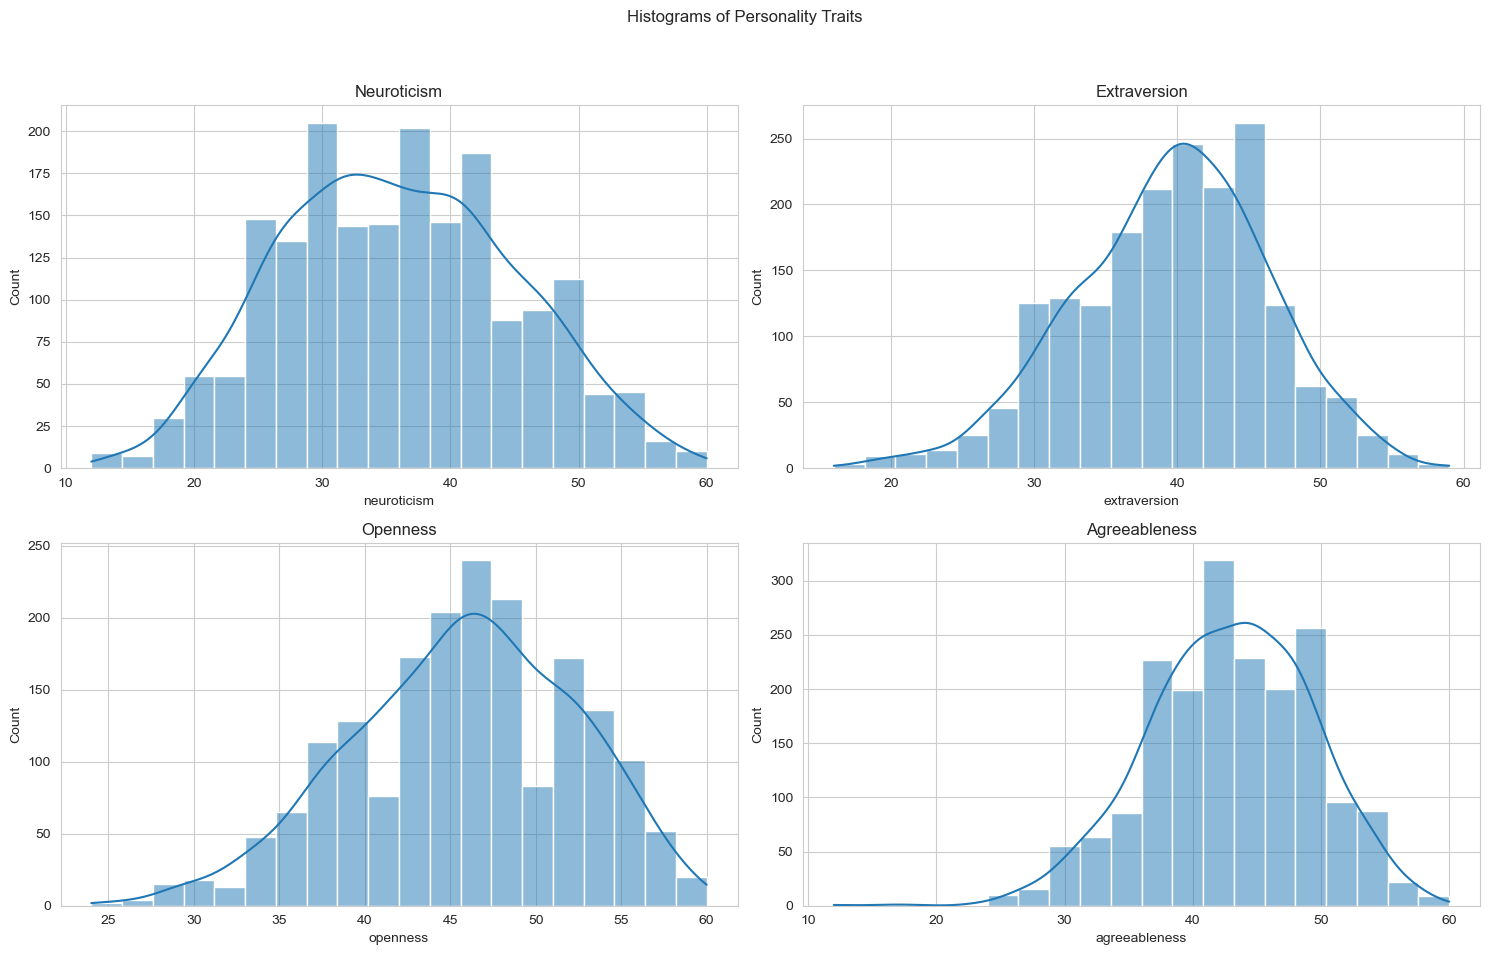

In [10]:
sns.set_style("whitegrid")


fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle("Histograms of Personality Traits")

sns.histplot(df_cannabis["neuroticism"], bins=20, kde=True, ax=axes[0, 0])
axes[0, 0].set_title("Neuroticism")

sns.histplot(df_cannabis["extraversion"], bins=20, kde=True, ax=axes[0, 1])
axes[0, 1].set_title("Extraversion")

sns.histplot(df_cannabis["openness"], bins=20, kde=True, ax=axes[1, 0])
axes[1, 0].set_title("Openness")

sns.histplot(df_cannabis["agreeableness"], bins=20, kde=True, ax=axes[1, 1])
axes[1, 1].set_title("Agreeableness")

plt.tight_layout(rect=[0, 0.03, 1, 0.95])


plt.show()

# Plot des différentes features en fonction de la consommation de cannabis

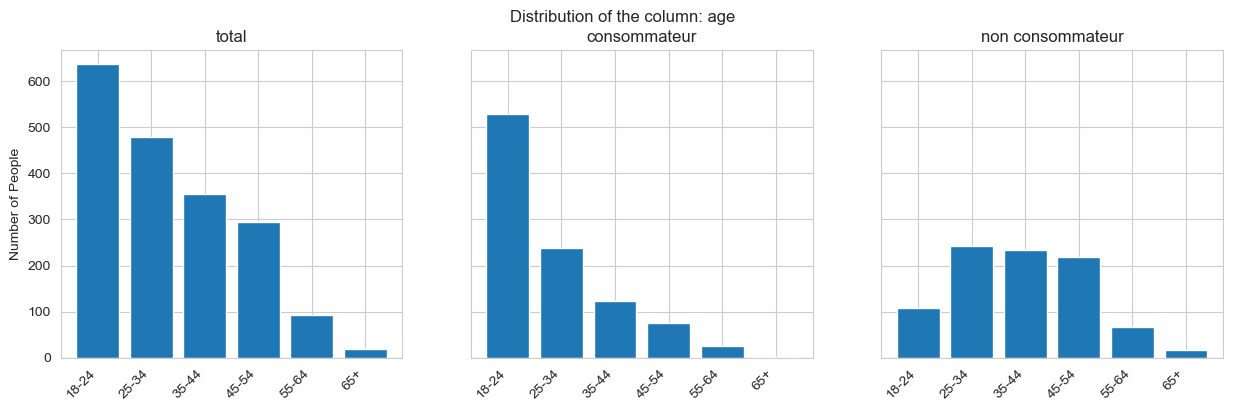

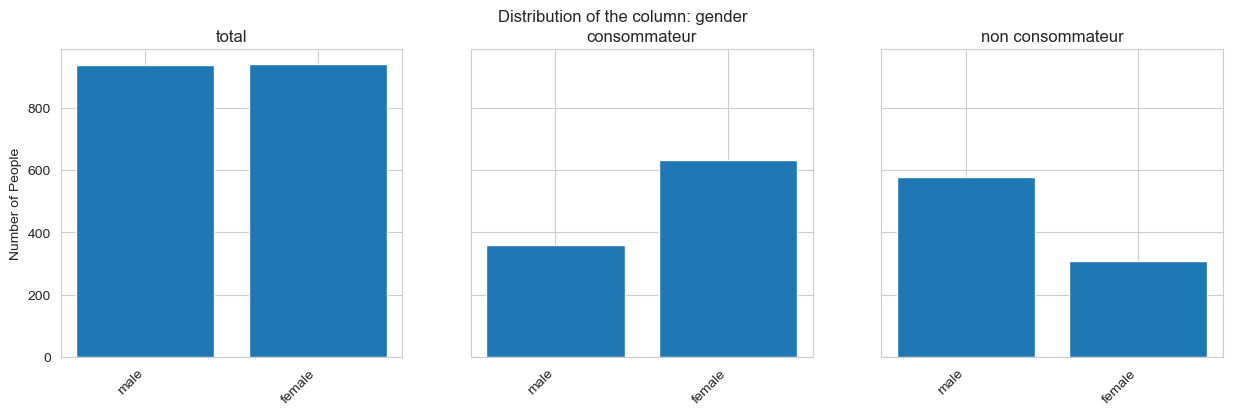

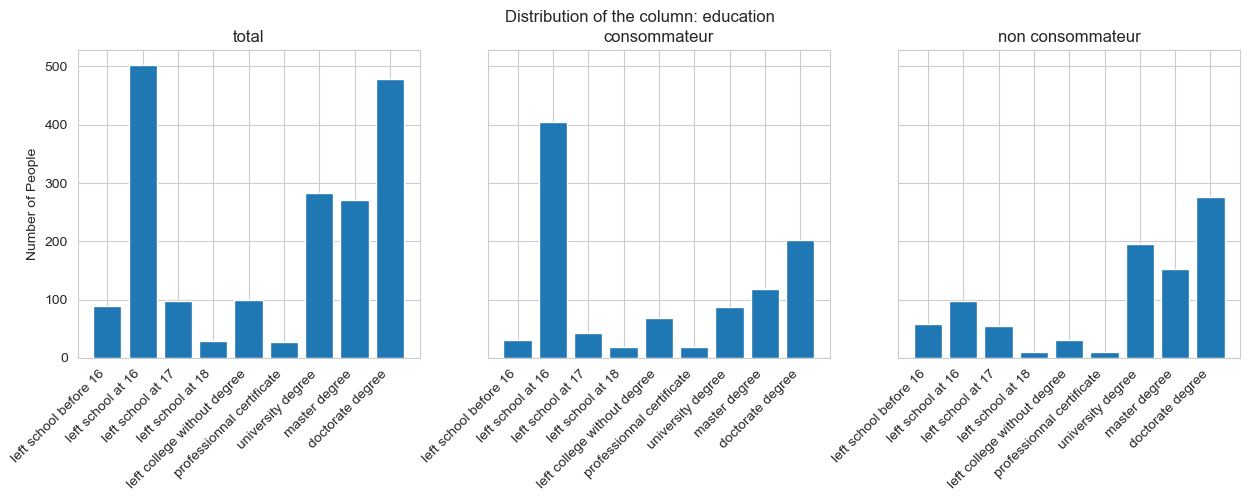

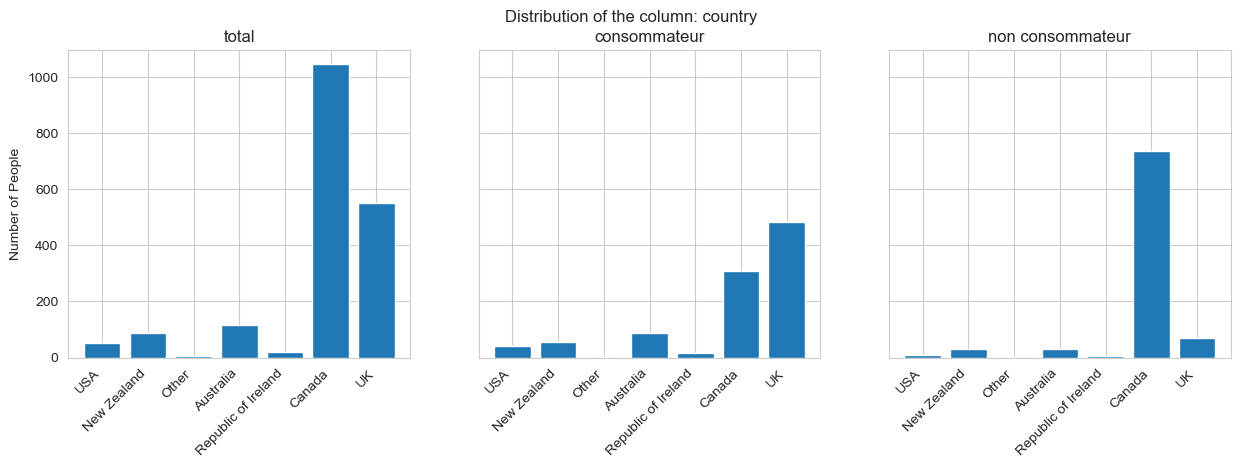

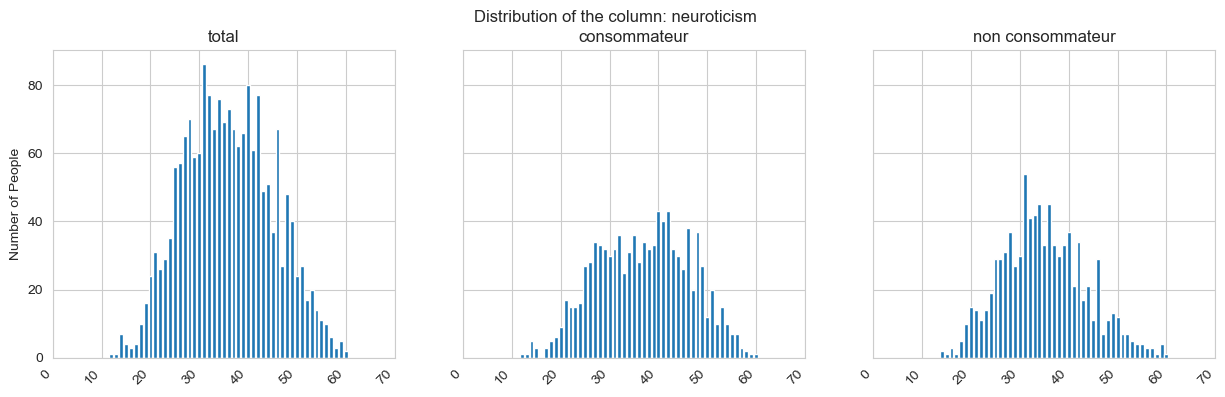

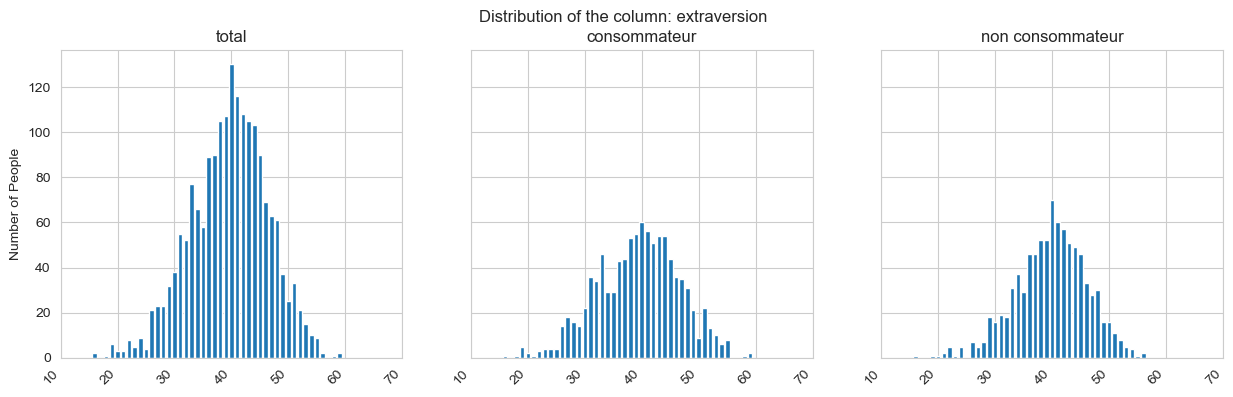

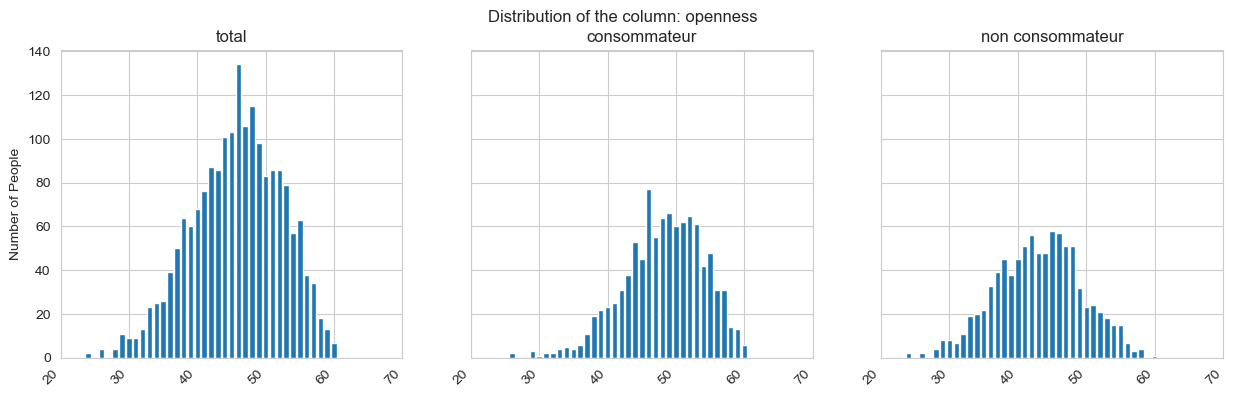

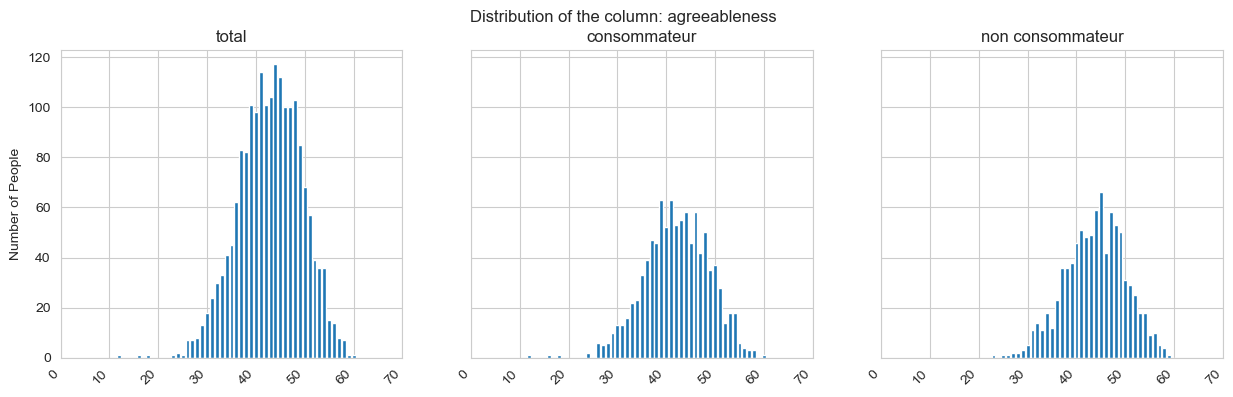

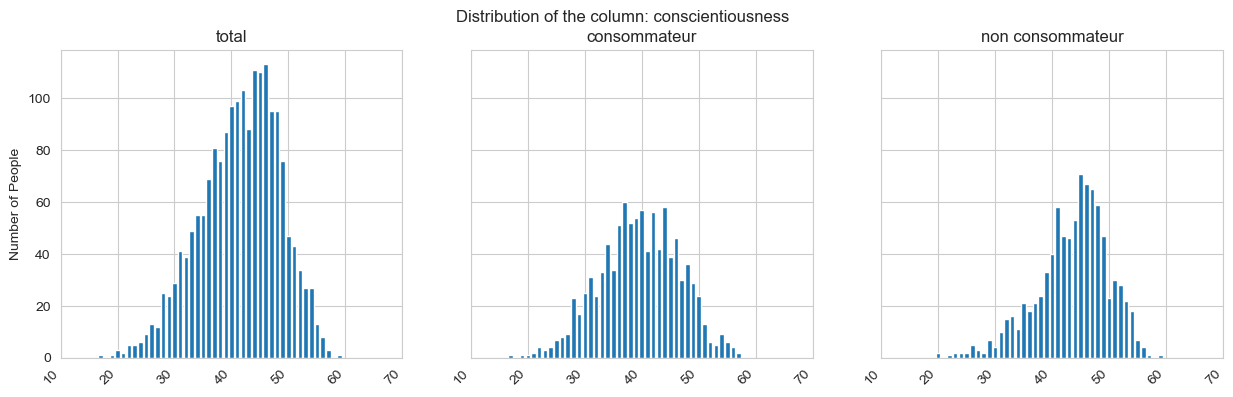

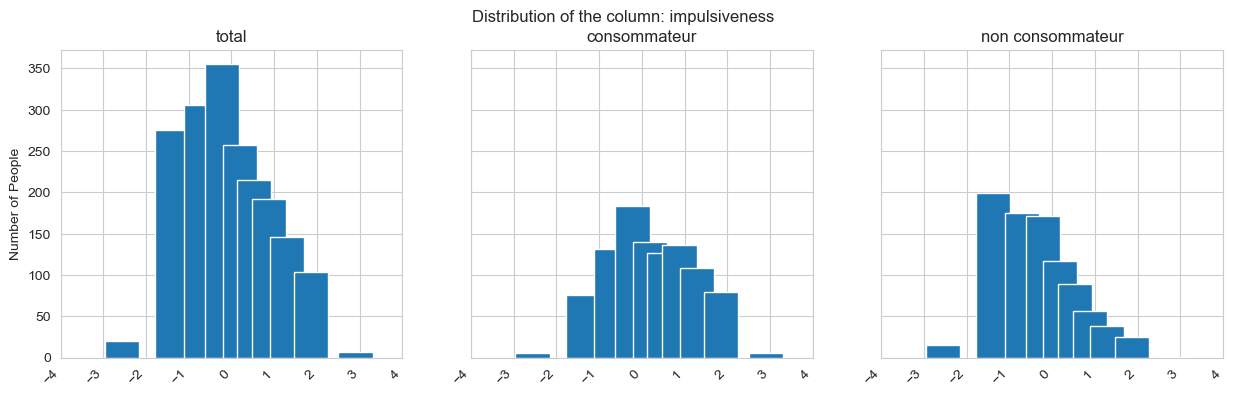

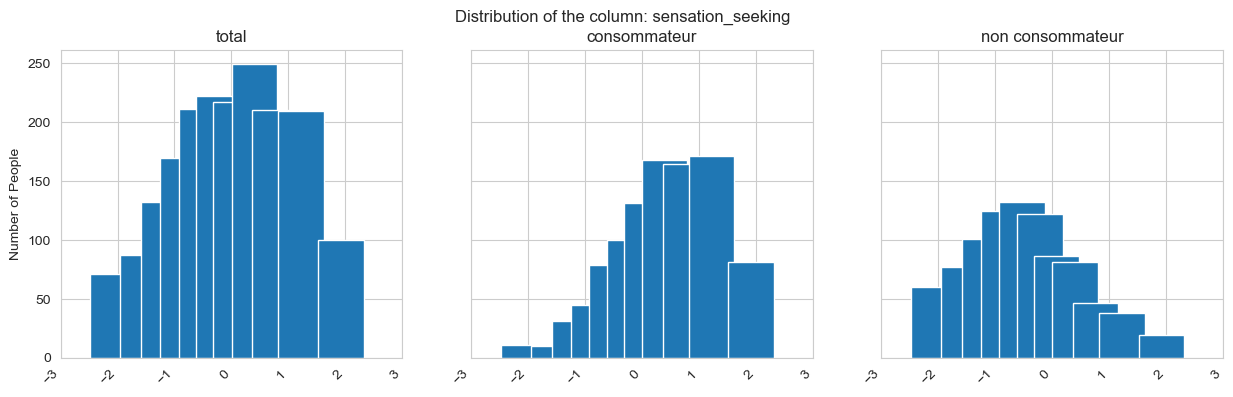

In [11]:
def prepare_data_for_column(df, column, group_col):
    """
    Prepare the dataframe for plotting by counting values for a specified column.

    This function creates a new dataframe with unique values of the given column as the index.
    It then merges count data for each unique value based on the specified grouping column.
    Finally, it merges the total count for each unique value and prepares the dataframe for plotting.

    Args:
    - df (DataFrame): The source dataframe.
    - column (str): The column to be analyzed.
    - group_col (str): The column to group by (e.g., 'cannabis').

    Returns:
    - DataFrame: A dataframe prepared for plotting, with counts of each group and total counts.
    """
    # Initialize a new dataframe to hold counts
    df_count = pd.DataFrame()

    # Extract and sort unique values from the column
    df_count["index"] = df[column].drop_duplicates().sort_values()
    df_count = df_count.set_index("index")

    # Iterate over unique values in the group column and merge count data
    for value in df[group_col].unique():
        df_temp = df[df[group_col] == value][column].value_counts().sort_index()
        df_count = df_count.merge(
            df_temp, how="outer", left_index=True, right_index=True
        )
        df_count.rename(
            {df_count.columns[-1]: f"{group_col}_{value}"}, axis=1, inplace=True
        )

    # Merge total count for each unique value
    total_count = (
        df[column].value_counts(sort=False, normalize=False, dropna=False).sort_index()
    )
    df_count = df_count.merge(
        total_count, how="outer", left_index=True, right_index=True
    )
    df_count.rename({df_count.columns[-1]: "total"}, axis=1, inplace=True)

    # Fill missing values with 0 and sort the dataframe
    df_count.fillna(0, inplace=True)
    df_count.sort_index(inplace=True)

    return df_count


def plot_distribution(df_count, features, col):
    """
    Plot the distribution of a specific column in the dataframe.

    This function sets up a figure with three subplots, each representing a different category
    (total, cannabis consumers, non-cannabis consumers). It then creates bar plots for these categories
    using the data prepared by `prepare_data_for_column`.

    Args:
    - df_count (DataFrame): The prepared dataframe for plotting.
    - features (dict): Dictionary of features for X-axis.
    - col (str): The column to be plotted.
    """
    # Set up the figure with three subplots
    fig, axes = plt.subplots(1, 3, sharey=True, figsize=(15, 4))
    fig.suptitle(f"Distribution of the column: {col}")

    # Define X and Y values for the plots
    try:
        X = features[col].values()
    except KeyError:
        X = df_count.index.tolist()

    Y_values = {
        "total": df_count["total"],
        "consommateur": df_count[f"cannabis_1"],
        "non consommateur": df_count[f"cannabis_-1"],
    }

    # Plot bar plots for each category
    for ax, (category, Y) in zip(axes, Y_values.items()):
        ax.bar(X, Y, label=X)
        ax.set_title(category)
        if category == "total":
            ax.set_ylabel("Number of People")
        ax.set_xticks(ax.get_xticks(), ax.get_xticklabels(), rotation=45, ha="right")

    plt.draw()


# Main loop to process each column in the dataframe
for col in df_cannabis.columns[:-1]:
    # Prepare data for the current column
    df_count = prepare_data_for_column(df_cannabis, col, 'cannabis')
    
    # Plot distribution for the current column
    plot_distribution(df_count, features, col)

### Commentaire sur les plots

On remarque que la consommation de cannabis est très élevé chez les jeunes entre 18 et 25 ans et que la consommation diminue avec l'âge. \
On remarque que la consommation de cannabis est plus importante chez les femmes que chez les hommes. \



Concernant l'age on peut le voir plus précisemment avec le plot suivant : \

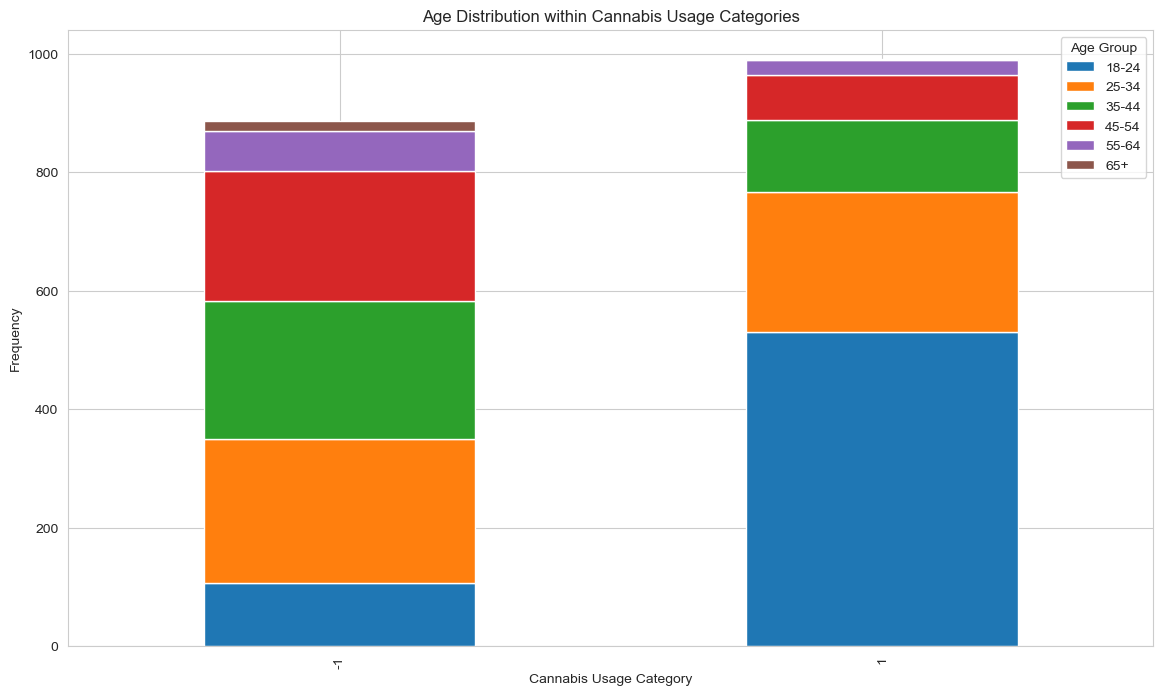

In [12]:
# Basic statistics for age distribution among cannabis users
# Since age is a categorical variable, we'll just get the frequency count for each category
age_distribution = df_cannabis.groupby("cannabis")["age"].value_counts().unstack()
# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Plot for age distribution within each cannabis usage category
age_distribution.plot(kind="bar", figsize=(14, 8), stacked=True)
plt.title("Age Distribution within Cannabis Usage Categories")
plt.xlabel("Cannabis Usage Category")
plt.ylabel("Frequency")
plt.legend(title="Age Group")
plt.show()

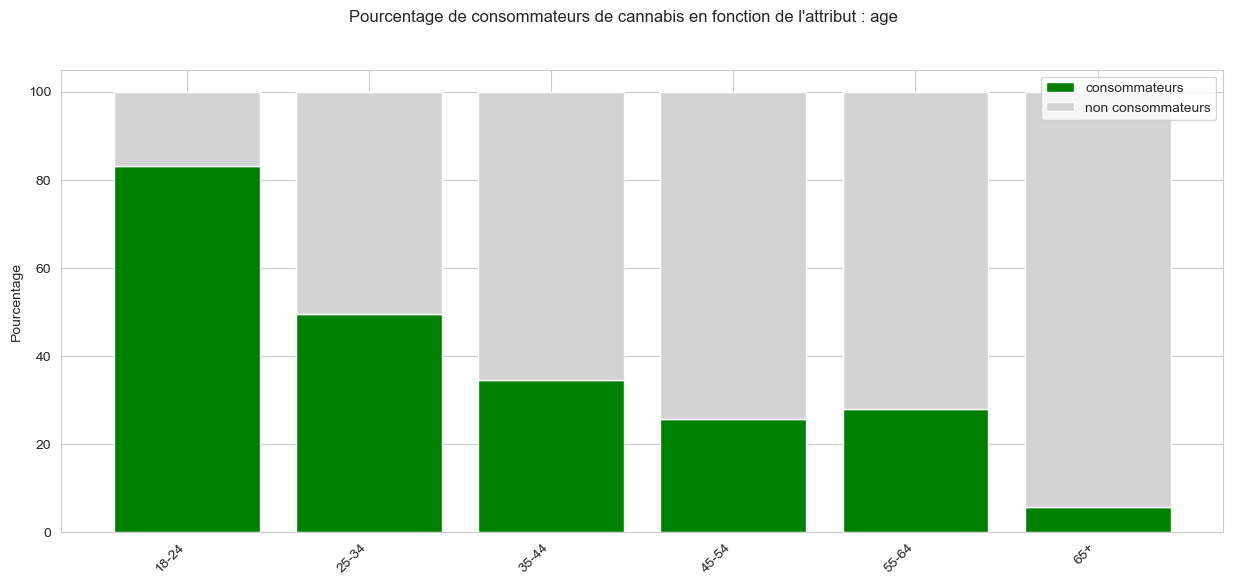

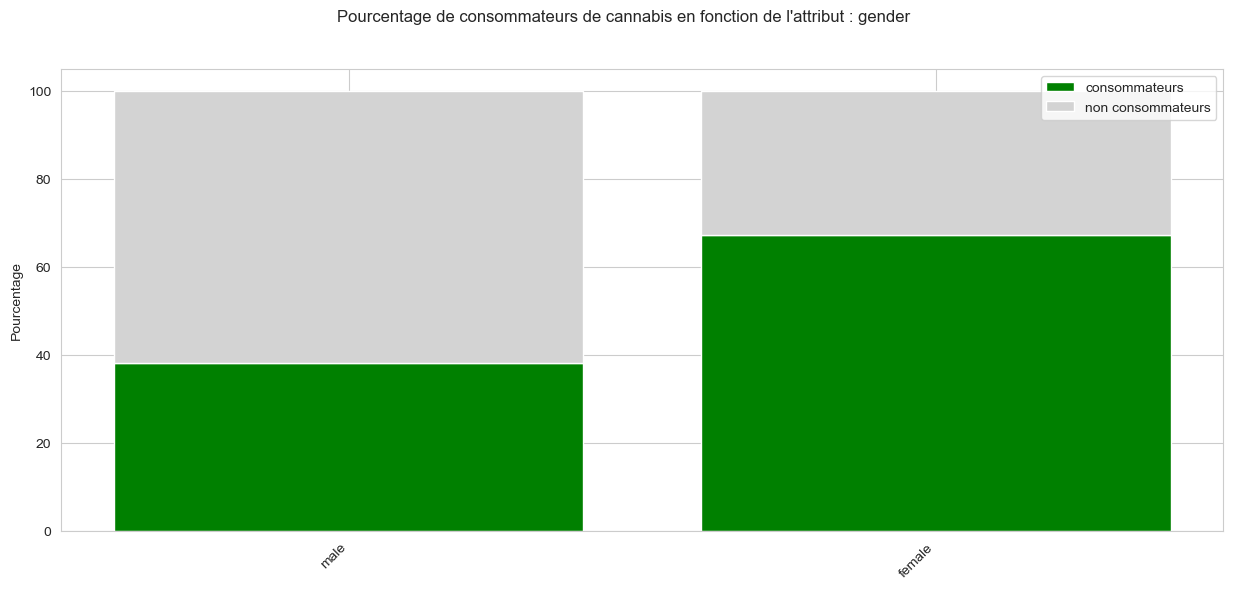

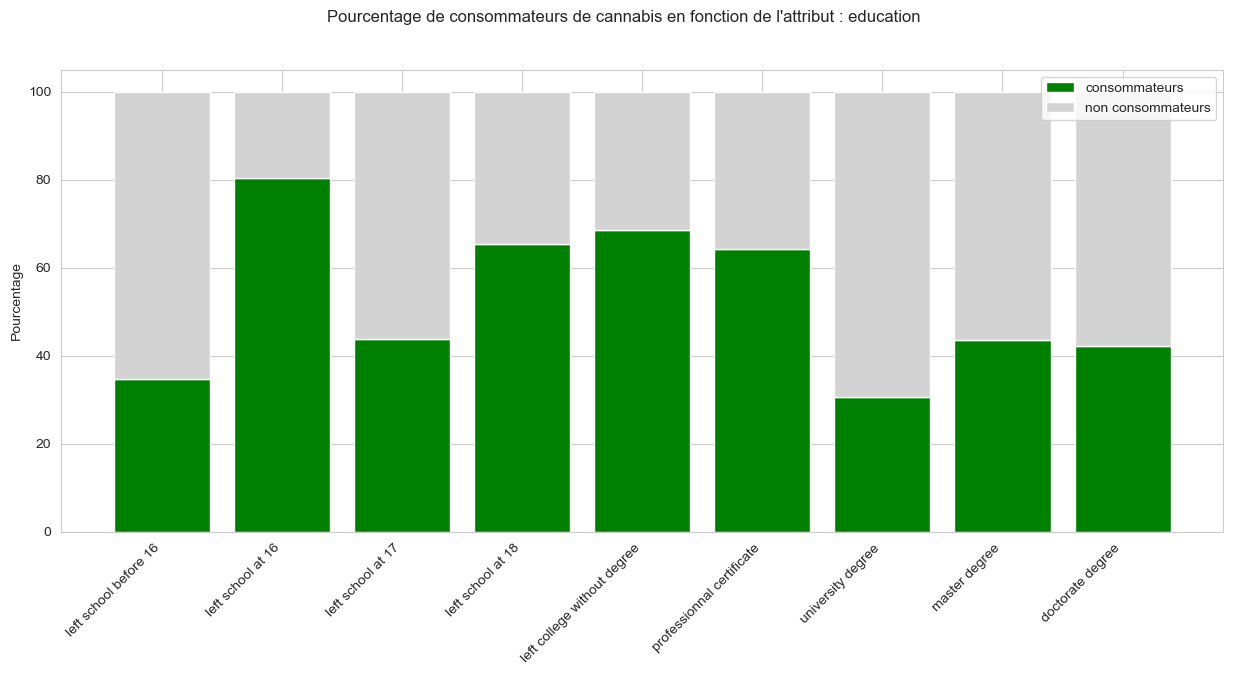

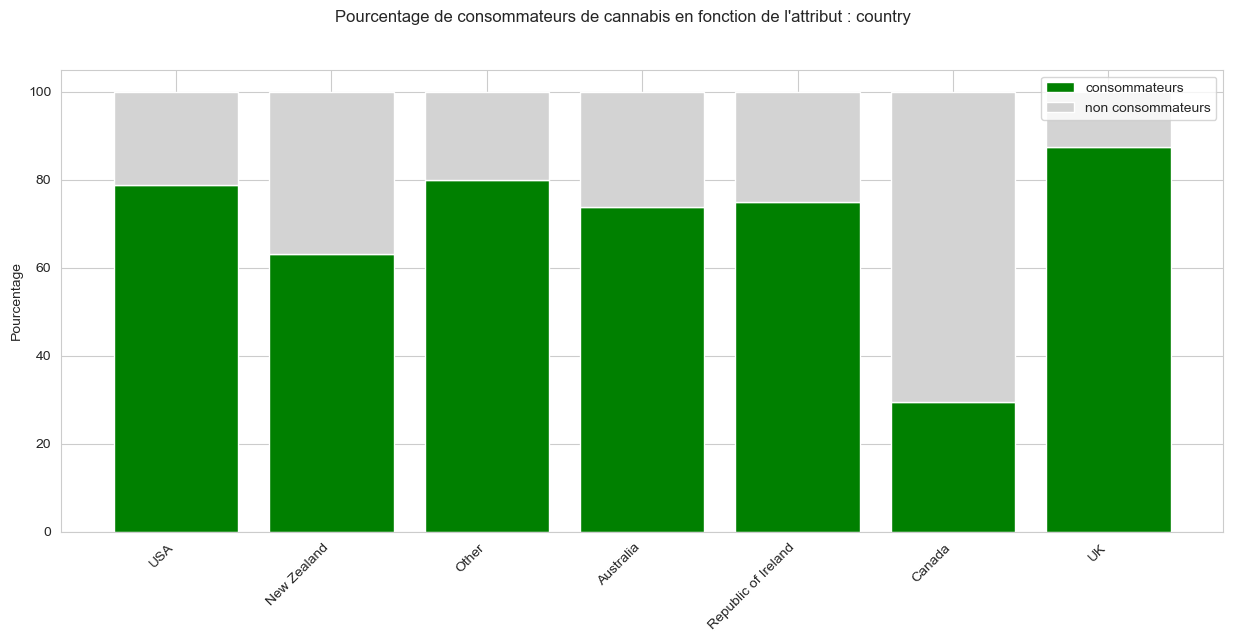

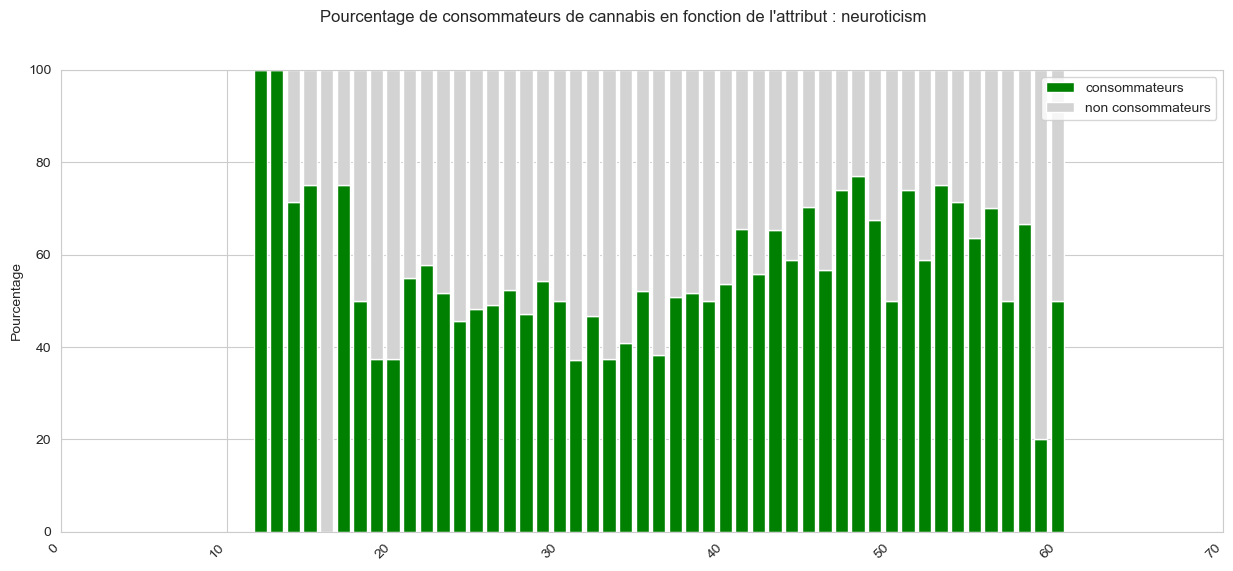

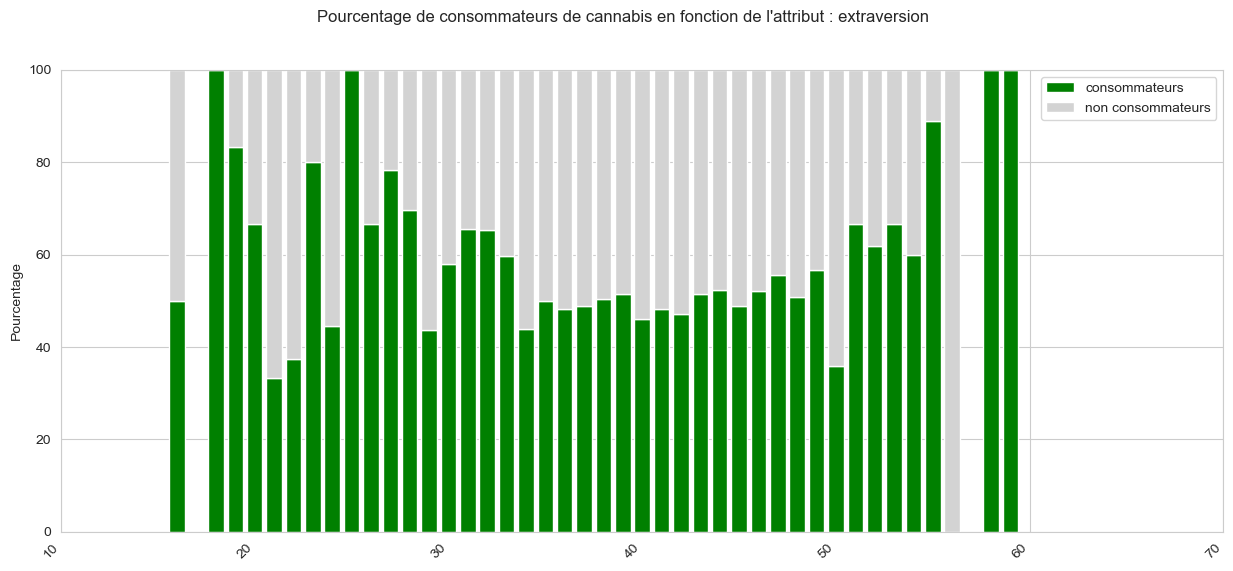

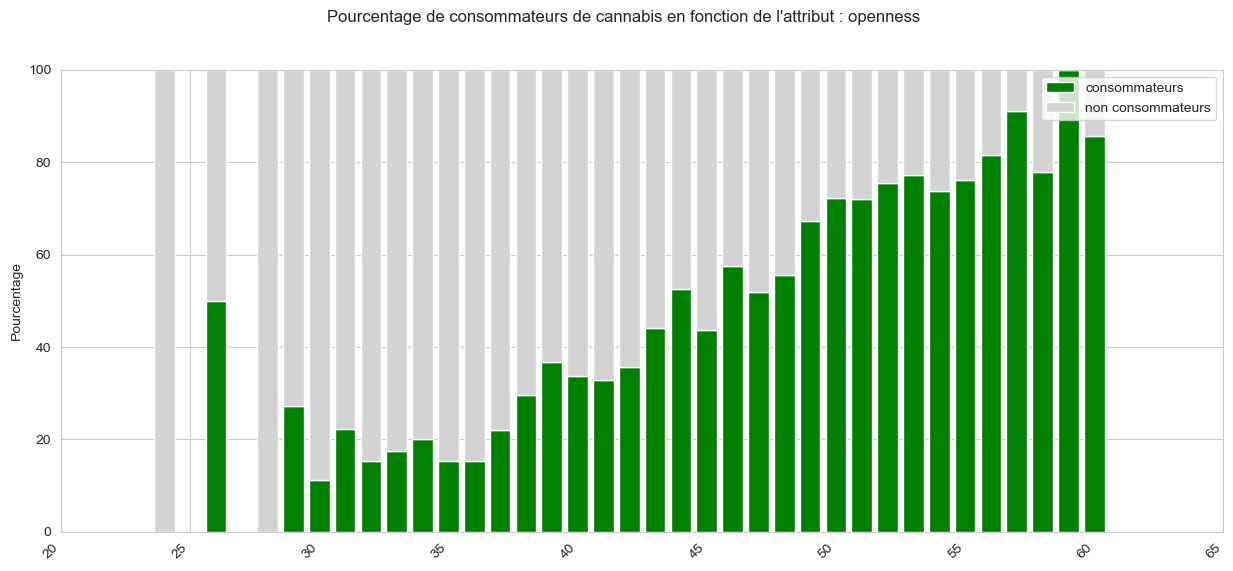

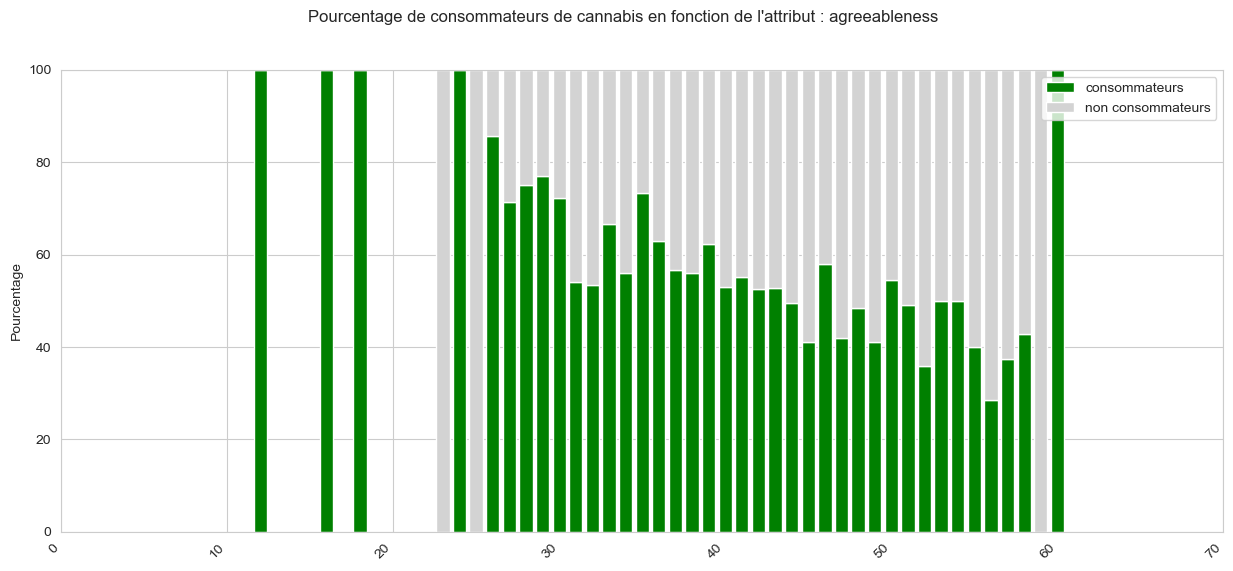

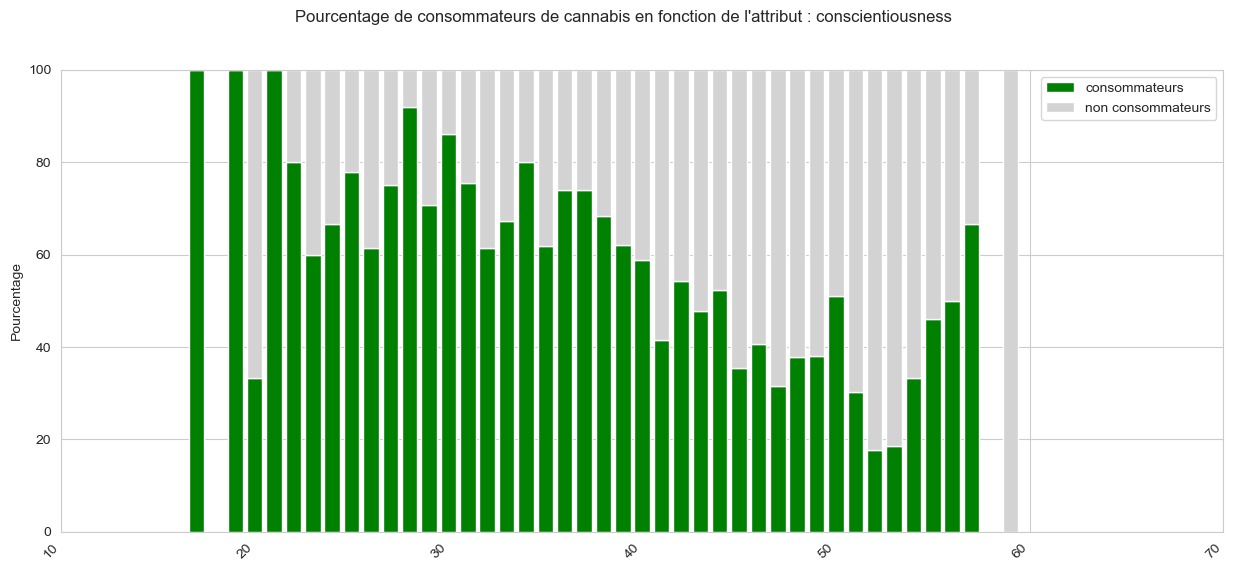

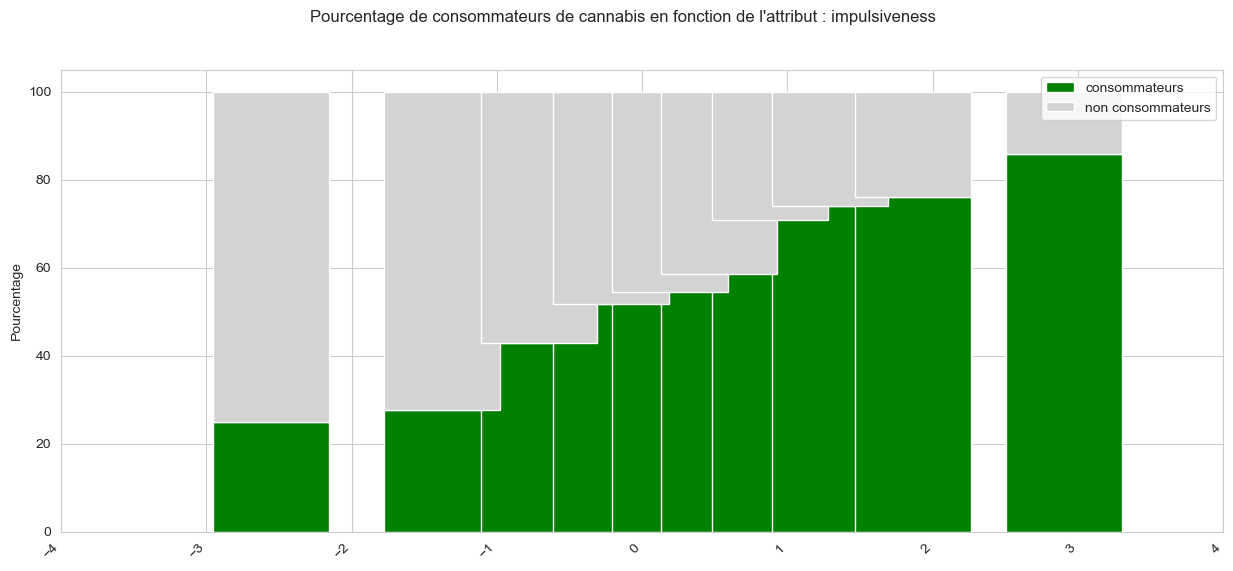

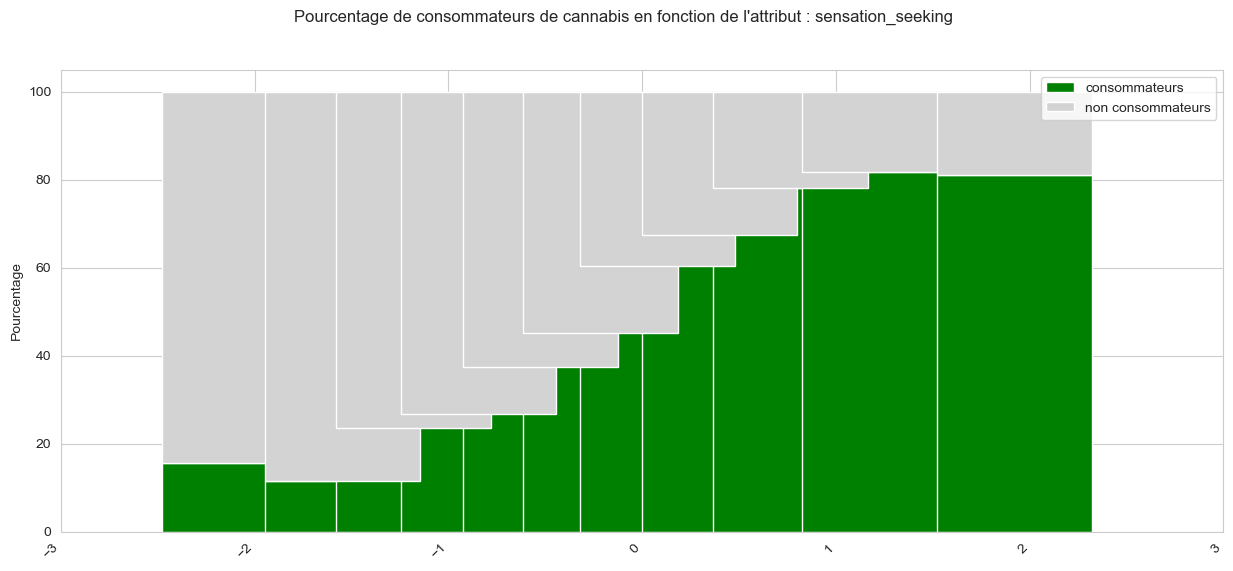

In [13]:
def prepare_percentage_data(df, column, group_col):
    """
    Prepare the dataframe for plotting percentages for a specified column.

    This function creates a new dataframe with unique values of the given column as the index.
    It then calculates the percentages of each category based on the specified grouping column.
    Finally, it prepares the dataframe for plotting.

    Args:
    - df (DataFrame): The source dataframe.
    - column (str): The column to be analyzed.
    - group_col (str): The column to group by (e.g., 'cannabis').

    Returns:
    - DataFrame: A dataframe prepared for plotting, with percentage counts of each group.
    """
    # Initialize a new dataframe to hold percentages
    df_percent = pd.DataFrame()
    df_percent["index"] = df[column].drop_duplicates().sort_values()
    df_percent = df_percent.set_index("index")

    # Calculate and merge percentages for each category
    for value in df[group_col].unique():
        count_series = df[df[group_col] == value][column].value_counts().sort_index()
        df_percent = df_percent.merge(
            count_series, how="outer", left_index=True, right_index=True
        )
        df_percent.rename(
            {df_percent.columns[-1]: f"{group_col}_{value}"}, axis=1, inplace=True
        )

    # Merge total count and calculate percentages
    total_count = (
        df[column].value_counts(sort=False, normalize=False, dropna=False).sort_index()
    )
    df_percent = df_percent.merge(
        total_count, how="outer", left_index=True, right_index=True
    )
    df_percent.rename({df_percent.columns[-1]: "total"}, axis=1, inplace=True)

    # Replace NaN with 0 and calculate percentages
    df_percent.fillna(0, inplace=True)
    df_percent[f"{group_col}_1"] = (
        df_percent[f"{group_col}_1"] / df_percent["total"] * 100
    )
    df_percent[f"{group_col}_-1"] = (
        df_percent[f"{group_col}_-1"] / df_percent["total"] * 100
    )

    return df_percent


def plot_percentage_distribution(df_percent, features, col):
    """
    Plot the percentage distribution of a specific column in the dataframe.

    This function sets up a figure and creates a stacked bar plot showing the percentage of
    cannabis consumers and non-consumers for each category in the given column.

    Args:
    - df_percent (DataFrame): The prepared dataframe for plotting.
    - features (dict): Dictionary of features for X-axis.
    - col (str): The column to be plotted.
    """
    # Define X and Y values for the plots
    try:
        X = features[col].values()
    except KeyError:
        X = df_percent.index.tolist()

    Y1 = df_percent["cannabis_1"]
    Y2 = df_percent["cannabis_-1"]

    # Set up the figure
    fig, ax = plt.subplots(figsize=(15, 6))
    fig.suptitle(
        f"Pourcentage de consommateurs de cannabis en fonction de l'attribut : {col}"
    )

    # Create stacked bar plot
    ax.bar(X, Y1, label="consommateurs", color="green")
    ax.bar(X, Y2, bottom=Y1, label="non consommateurs", color="lightgray")
    ax.set_ylabel("Pourcentage")
    ax.set_xticks(ax.get_xticks(), ax.get_xticklabels(), rotation=45, ha="right")
    ax.legend(loc="upper right")

    plt.draw()


# Main loop to process each column in the dataframe
for col in df_cannabis.columns[:-1]:
    # Prepare percentage data for the current column
    df_percent = prepare_percentage_data(df_cannabis, col, "cannabis")

    # Plot percentage distribution for the current column
    plot_percentage_distribution(df_percent, features, col)

plt.show()